In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import os

In [5]:
work_dir = os.environ['WORK']

In [197]:
ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', transform=transform)
print(len(ds))
# ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', split='val', transform=transform)
# print(len(ds))

1281167


In [281]:
class ImageNetN(torch.utils.data.Dataset):
    """ImageNet N classes dataset"""

    def __init__(self, root_dir, n_classes=1000, split='train', transform=None, imgnetn=None):
        self.root_dir = root_dir
        self.n_classes = n_classes
        self.split = split
        self.transform = transform
        self.ds = torchvision.datasets.ImageNet(root_dir, split=split, transform=transform)
        
        if imgnetn is not None:
            self.class_idxs = imgnetn.class_idxs
        elif len(ds.classes)==n_classes:
            self.class_idxs = np.arange(n_classes)
        else:
            self.class_idxs = np.random.permutation(len(ds.classes))[:n_classes]
            
        self.classes = np.array([i[0] for i in ds.classes])[self.class_idxs]
        idx_new2old = self.class_idxs
        idx_old2new = {e: idx for idx, e in enumerate(self.class_idxs)}
        self.imgs = [(x, idx_old2new[y]) for x, y in ds.imgs if y in self.class_idxs]
    
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        x, y = self.imgs[idx]
        x = ds.loader(x)
        if self.transform:
            x = self.transform(x)
        return x, y


imnet = ImageNetN(f'{work_dir}/datasets/imagenet/', n_classes=60, split='val', transform=transform)
idl = DataLoader(imnet, batch_size=200, shuffle=True)
x, y = next(iter(idl))
print(imnet.classes)
print(x.shape)
print(y)

['hartebeest' 'birdhouse' 'home theater' 'unicycle' 'iPod' 'sea urchin'
 'indigo bunting' 'bison' 'squirrel monkey' 'zucchini' 'vase'
 'barber chair' 'valley' 'water jug' 'pitcher' 'African elephant'
 'hamster' 'Great Pyrenees' 'dalmatian' 'affenpinscher' 'proboscis monkey'
 'llama' 'shovel' 'brassiere' 'reel' 'golden retriever' 'corn' 'slug'
 'robin' 'handkerchief' 'mortarboard' 'groenendael' 'Samoyed' 'cliff'
 'gyromitra' 'bulbul' 'espresso' 'Model T' 'jellyfish'
 'Old English sheepdog' 'buckle' 'soft-coated wheaten terrier'
 'Arctic fox' 'mantis' 'bassinet' 'pelican' 'ox' 'Rottweiler' 'plate rack'
 'butcher shop' 'chest' 'barrow' 'broom' 'trifle' 'crane' 'file' 'racket'
 'maze' 'crate' 'microwave']
torch.Size([200, 3, 224, 224])
tensor([50, 13, 20, 20,  1, 13, 48, 45, 31,  0, 52, 58, 41, 44, 29,  1, 34, 23,
         0, 56, 42, 22, 43, 29, 18, 28, 30, 57, 44, 53, 47, 12, 29, 50, 26, 24,
        51, 41, 42, 30, 25, 33, 52, 27, 22, 37,  5, 52, 27, 11, 57,  2, 58,  3,
         1, 46, 58

In [160]:
# root = torchvision.datasets.ImageNet('$WORK/datasets/imagenet/', download=False)

transform = transforms.Compose([
    # transforms.CenterCrop(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
# transform = transforms.Compose([
# #     transforms.Scale(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

ds = torchvision.datasets.ImageNet(f'{work_dir}/datasets/imagenet/', transform=transform)
# ds = torchvision.datasets.CIFAR10(f'{work_dir}/datasets/cifar10/', transform=transform)

dl = DataLoader(ds, batch_size=1000, shuffle=True)
# print('DONE PROCESSING IMAGENET')
print('len ds', len(ds))
print('ds', ds)

# for x, y in dl:
#     print(x.shape, y.shape)
x, y = next(iter(dl))
print(x.shape, y.shape)


len ds 1281167
ds Dataset ImageNet
    Number of datapoints: 1281167
    Root location: /work/08258/akumar01/maverick2/datasets/imagenet/
    Split: train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
torch.Size([1000, 3, 224, 224]) torch.Size([1000])


In [184]:
len(ds.targets)

1281167

In [71]:
import os.path

In [114]:
len([i for i in os.listdir('/work/08258/akumar01/maverick2/datasets/imagenet/train')
     if i.endswith('.tar')])

1000

In [129]:
from tqdm.notebook import tqdm
import subprocess


In [152]:
d = '/work/08258/akumar01/maverick2/datasets/imagenet/train/'
tar_files = [i for i in os.listdir(d) if i.endswith('.tar')]
for i, tar_file in enumerate(tar_files):
    name = tar_file[:-4]
    subprocess.run(['mkdir', d+name])
    subprocess.run(['tar', '-xf', d+tar_file, '-C', d+name])
    print(i, '/', len(tar_files))

0 / 1000
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000

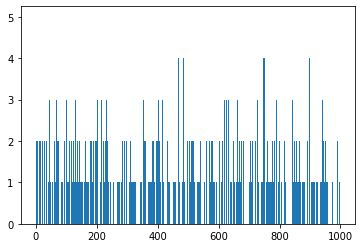

In [174]:
plt.hist(y.numpy(), bins=1000);

30 American bullfrog


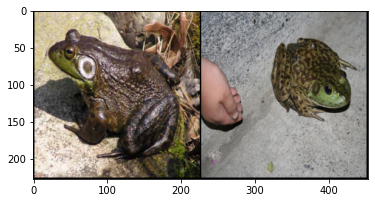

In [177]:
y_idx = scipy.stats.mode(y).mode[0]
y_idx = 30
xp = x[y==y_idx]
print(y_idx, labels[y_idx])
plt.imshow(torchvision.utils.make_grid(xp).permute(1, 2,0).numpy())
plt.show()

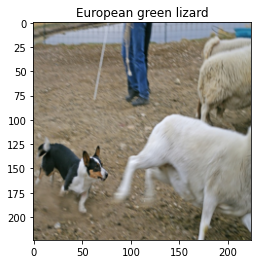

In [60]:
idx = 7
plt.imshow(x[idx].permute(1, 2, 0).numpy())
plt.title(labels[y[idx]])
plt.show()

In [54]:
import json

In [55]:
with open(f'{work_dir}/datasets/imagenet/imagenet-simple-labels.json') as f:
    labels = np.array(json.load(f))
with open(f'{work_dir}/datasets/imagenet/imagenet1000_clsidx_to_labels.txt') as f:
    labels2 = eval(f.read())

In [69]:
for i in range(1000):
    print(f'{i:04d}: ', labels[i], '=======', labels2[i])

0000:  tench ======= tench, Tinca tinca
0001:  goldfish ======= goldfish, Carassius auratus
0002:  great white shark ======= great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
0003:  tiger shark ======= tiger shark, Galeocerdo cuvieri
0004:  hammerhead shark ======= hammerhead, hammerhead shark
0005:  electric ray ======= electric ray, crampfish, numbfish, torpedo
0006:  stingray ======= stingray
0007:  cock ======= cock
0008:  hen ======= hen
0009:  ostrich ======= ostrich, Struthio camelus
0010:  brambling ======= brambling, Fringilla montifringilla
0011:  goldfinch ======= goldfinch, Carduelis carduelis
0012:  house finch ======= house finch, linnet, Carpodacus mexicanus
0013:  junco ======= junco, snowbird
0014:  indigo bunting ======= indigo bunting, indigo finch, indigo bird, Passerina cyanea
0015:  American robin ======= robin, American robin, Turdus migratorius
0016:  bulbul ======= bulbul
0017:  jay ======= jay
0018:  magpie ======= magpie
0019

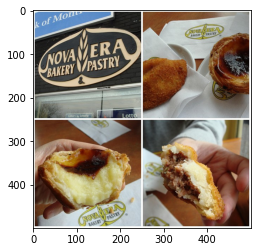

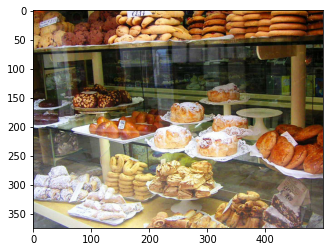

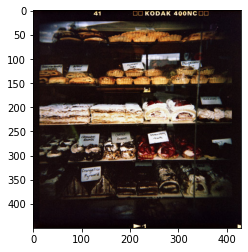

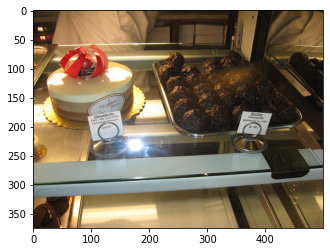

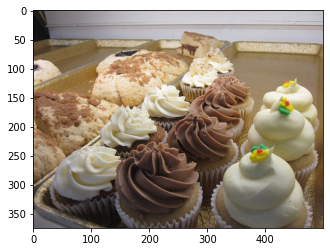

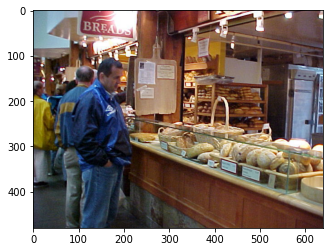

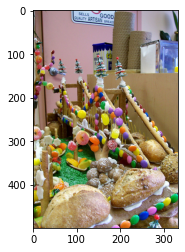

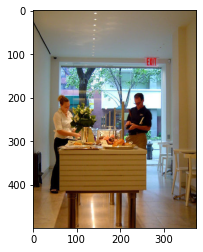

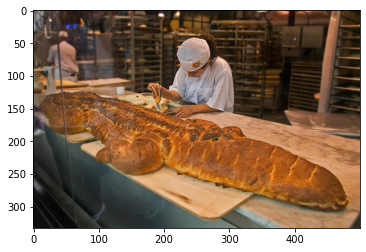

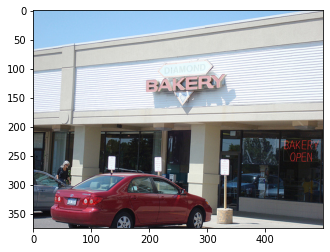

In [80]:
file = '/work/08258/akumar01/maverick2/datasets/imagenet/train/n02776631/'

for f in os.listdir(file)[:10]:
    img = plt.imread(file+f)
    plt.imshow(img)
    plt.show()